In [1]:
#!/usr/bin/env python3
# pip install pandas
# pip install requests
# pip install numpy
# pip install seaborn
# pip install matplotlib
# pip install nbconvert
# pip install reliability
# pip install rpy2
# pip install ipysheet
# pip install tabulate
import os
from IPython.display import HTML, display, JSON, clear_output
import tabulate
from cmath import nan
import jinja2
import os
import pandas as pd
import requests
import json
import py7zr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import time
import datetime
from itertools import groupby
import numpy
from scipy.stats import pearsonr, fisher_exact
import pickle
import _pickle as cPickle
from decimal import *
import arabic_reshaper
# install: pip install python-bidi
from bidi.algorithm import get_display
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
from scipy.stats import fisher_exact

from statsmodels.graphics.mosaicplot import mosaic

from tqdm import tqdm


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

%matplotlib inline
# session = requests.Session()
# retry = Retry(connect=3, backoff_factor=0.5)
# adapter = HTTPAdapter(max_retries=retry)
# session.mount('http://', adapter)
# session.mount('https://', adapter)


Some helper functions:


In [2]:
with open("../jinja2/data/21.json", "r") as inputFile:
    data = json.load(inputFile)
NormData = pd.json_normalize(data['users'])
# Variables = dict()
Variables = {}


def AddLatexVariable(VarName, VarValue, Var):
    Var[(len(list(Var.keys()))) + 1] = {
        'variableName':
        VarName,
        'variableValue': VarValue
    }



In [3]:
# print([i for i in list(NormData.columns) if i.startswith('Assessment.Assessment')])
print([i for i in list(NormData.columns) if 'Assessment' in i])
print(len(NormData[NormData['Assessment.Assessment.WaitingRoom'] == 'ExitExp']))
print(len(NormData[NormData['Assessment.Assessment.WaitingRoom'] == 'ContinueExp']))

# ContinueExp ExitExp

['Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised', 'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised', 'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised', 'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01', 'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01', 'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01', 'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02', 'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02', 'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02', 'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03', 'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03', 'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03', 'Assessment.Assessment.

In [4]:

#  ! #######################
LabelsUsualSuspects = ['id',
                       'LandingPage.submittime',
                       'Assessment.Assessment.ExperimentGroup',
                       'Assessment.Assessment.ReceiveOtherResultsRequest',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',

                       'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01',

                       'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02',

                       'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03',

                       'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04',
                       'Assessment.Assessment.WaitingRoom',
                       'Assessment.Assessment.ReceiveOtherResultsRequest',
                       'Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfEmailFromLastForm',
                       'Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfTelegramIDFromLastForm',
                       'Assessment.Assessment.DaysToSendTheMail',
                       'Assessment.Assessment.HourOfDay',

                       'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.CityName',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.JobTitle',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.MajorNameForOther',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.UniversityName',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.ImportanceOfScience',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.DataScieneFamiliarity',
                       'SVOSliderTest.svo',
                       'SVOSliderTest.type',
                       'SVOSliderTest.isConsistent',
                       'SVOSliderTest.selfTotal',
                       'SVOSliderTest.otherTotal',
                       'darktriad.darktriadsurvey.DTriad01Mac01',
                       'darktriad.darktriadsurvey.DTriad02Mac02',
                       'darktriad.darktriadsurvey.DTriad03Mac03',
                       'darktriad.darktriadsurvey.DTriad04Mac04',
                       'darktriad.darktriadsurvey.DTriad05Psy01',
                       'darktriad.darktriadsurvey.DTriad06Psy02',
                       'darktriad.darktriadsurvey.DTriad07Psy03',
                       'darktriad.darktriadsurvey.DTriad08Psy04',
                       'darktriad.darktriadsurvey.DTriad09Nars01',
                       'darktriad.darktriadsurvey.DTriad10Nars02',
                       'darktriad.darktriadsurvey.DTriad11Nars03',
                       'darktriad.darktriadsurvey.DTriad12Nars04',
                       'darktriad.isReversed',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy02',
                       'willingnessToPayOthers.attitudeGroupName',
                       'willingnessToPayOthers.attitudeisReversed',
                       'willingnessToPayOthers.normGroupName',
                       'willingnessToPayOthers.normisReversed',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-Attitude',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-AttitudeImportance',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-BehaviorQuestion',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IdentificationwiththeReferent',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IntentionQuestion',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-PerceivedBehavioralControlQuestion',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestion',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionContext',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionExpert',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',

                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherFamilyName01',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherName01',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherPhoneNumber01',

                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02',

                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03',

                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04',
                       'otherPIIDisClosure.submittime'
                       ]
LabelsUsualSuspectsSemantecBoolean = ['Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfEmailFromLastForm',
                                      'Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfTelegramIDFromLastForm',
                                      'InterventionQuestionnaire.InterventionQuestionnaireData.MajorNameForOther',
                                      'InterventionQuestionnaire.InterventionQuestionnaireData.CityName',
                                      'InterventionQuestionnaire.InterventionQuestionnaireData.JobTitle',
                                      'InterventionQuestionnaire.InterventionQuestionnaireData.UniversityName']
LabelsUsualSuspectsIntervalSVO = ['SVOSliderTest.svo',
                                  'SVOSliderTest.selfTotal',
                                  'SVOSliderTest.otherTotal']
LabelsUsualSuspectsIntervalDTR = ['darktriad.darktriadsurvey.DTriad01Mac01',
                                  'darktriad.darktriadsurvey.DTriad02Mac02',
                                  'darktriad.darktriadsurvey.DTriad03Mac03',
                                  'darktriad.darktriadsurvey.DTriad04Mac04',
                                  'darktriad.darktriadsurvey.DTriad05Psy01',
                                  'darktriad.darktriadsurvey.DTriad06Psy02',
                                  'darktriad.darktriadsurvey.DTriad07Psy03',
                                  'darktriad.darktriadsurvey.DTriad08Psy04',
                                  'darktriad.darktriadsurvey.DTriad09Nars01',
                                  'darktriad.darktriadsurvey.DTriad10Nars02',
                                  'darktriad.darktriadsurvey.DTriad11Nars03',
                                  'darktriad.darktriadsurvey.DTriad12Nars04',
                                  ]
LabelsUsualSuspectsValidityReliblity = ['darktriad.isReversed',
                                        'willingnessToPayOthers.attitudeGroupName',
                                        'willingnessToPayOthers.attitudeisReversed',
                                        'willingnessToPayOthers.normGroupName',
                                        'willingnessToPayOthers.normisReversed']

LabelsUsualSuspectsIntervalWTP = ['willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy01',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy02',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy01',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy02',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy01',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy02',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy01',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy02',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy01',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy02',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy01',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy02',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy01',
                                  'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy02',
                                  ]
LabelsUsualSuspectsOrdinalTPB = ['TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-Attitude',
                                 'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-AttitudeImportance',
                                 'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IdentificationwiththeReferent',
                                 'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IntentionQuestion',
                                 'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-PerceivedBehavioralControlQuestion',
                                 'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestion',
                                 'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionContext',
                                 'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionExpert']

LabelsUsualSuspectsNominalBooleanTPB = [
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-BehaviorQuestion']

LabelsUsualSuspectsOrdinal = [
    'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
    'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
    'InterventionQuestionnaire.InterventionQuestionnaireData.ImportanceOfScience',
    'InterventionQuestionnaire.InterventionQuestionnaireData.DataScieneFamiliarity',
]
LabelsUsualSuspectsNominalExperimentalIntervention = [
    'Assessment.Assessment.ExperimentGroup'
]
LabelsUsualSuspectsNominalBoolean = ['Assessment.Assessment.ReceiveOtherResultsRequest',
                                     'Assessment.Assessment.WaitingRoom',
                                     'SVOSliderTest.isConsistent',
                                     ]
LabelsUsualSuspectsNominal = ['InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
                              'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
                              'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
                              'SVOSliderTest.type',
                              ]
LabelsUsualSuspectsRatio = [
    'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
]
# شمردن تعداد افرادی که یک یا دو یا سه تا شماره تلفن شر کرده اند
LabelsUsualSuspectsSemanticNominalBooleanPost = [[
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised'], [
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01'], [
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02'], [
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03'], [
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04']]
LabelsUsualSuspectsSemanticNominalBooleanPre = [[
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber'], [
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherName01',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherFamilyName01',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherPhoneNumber01'], [
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02'], [
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03'], [
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04']
]


In [5]:
LabelsUsualSuspectsSemanticNominalBooleans = zip(
    LabelsUsualSuspectsSemanticNominalBooleanPre,
    LabelsUsualSuspectsSemanticNominalBooleanPost
)
# for LabelsUsualSuspectsSemanticNominalBooleanPre, LabelsUsualSuspectsSemanticNominalBooleanPost in LabelsUsualSuspectsSemanticNominalBooleans:
   # for DisclosureNoPre, DisclosureNoPost in zip(LabelsUsualSuspectsSemanticNominalBooleanPre, LabelsUsualSuspectsSemanticNominalBooleanPost):
# for Participant in CleandDataDFForPlots.index:
# df = df.reset_index()  # make sure indexes pair with number of rows

# for index, Participant in CleandDataDFForPlots.iterrows():
#     NameCountPre = 0
#     FamilyNameCountPre = 0
#     PhoneNoCountPre = 0
#     NameCountPost = 0
#     FamilyNameCountPost = 0
#     PhoneNoCountPost = 0
#     for DisclosureNoPre, DisclosureNoPost in LabelsUsualSuspectsSemanticNominalBooleans:


        
#         NameCountPre += len(CleandDataDFForPlots.loc[
#             CleandDataDFForPlots[DisclosureNoPre[0]].notnull()])

#         FamilyNameCountPre += len(CleandDataDFForPlots.loc[
#             CleandDataDFForPlots[DisclosureNoPre[1]].notnull()])

#         PhoneNoCountPre += len(CleandDataDFForPlots.loc[
#             CleandDataDFForPlots[DisclosureNoPre[2]].notnull()])

#         NameCountPost += len(CleandDataDFForPlots.loc[
#             CleandDataDFForPlots[DisclosureNoPost[0]].notnull()])

#         FamilyNameCountPost += len(CleandDataDFForPlots.loc[
#             CleandDataDFForPlots[DisclosureNoPost[1]].notnull()])

#         PhoneNoCountPost += len(CleandDataDFForPlots.loc[
#             CleandDataDFForPlots[DisclosureNoPost[2]].notnull()])
#     CleandDataDFForPlots.loc[Participant,'NameCountPre'] = NameCountPre
#     CleandDataDFForPlots.loc[Participant,'FamilyNameCountPre'] = FamilyNameCountPre
#     CleandDataDFForPlots.loc[Participant,'PhoneNoCountPre'] = PhoneNoCountPre
#     CleandDataDFForPlots.loc[Participant,'NameCountPost'] = NameCountPost
#     CleandDataDFForPlots.loc[Participant,'FamilyNameCountPost'] = FamilyNameCountPost
#     CleandDataDFForPlots.loc[Participant,'PhoneNoCountPost'] = PhoneNoCountPost
#     CleandDataDFForPlots.loc[Participant,'TotalPre'] = NameCountPre+FamilyNameCountPre+PhoneNoCountPre
#     CleandDataDFForPlots.loc[Participant,'TotalPost'] = NameCountPost+ FamilyNameCountPost+ PhoneNoCountPost
    


DFNotRepeatedNoneFilled = NormData.copy()
# print(type(DFNotRepeatedNoneFilled))

# for LabelsUsualSuspect in LabelsUsualSuspects:
#     experiment  = DFNotRepeatedNoneFilled.loc[:, LabelsUsualSuspect]
# experiment  = DFNotRepeatedNoneFilled.loc[:, LabelsUsualSuspects]
experimentCopy = DFNotRepeatedNoneFilled.loc[:, LabelsUsualSuspects]

#  ! #######################

# print(len(experimentCopy))
# experimentCopy.head().style
# CleandDataDFForPlots.to_excel("../jinja2/data/CleandDataDFForPlotsCounts.xlsx")




In [6]:

experimentCopy01 = experimentCopy[pd.to_numeric(experimentCopy[
    'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']) >= 18].copy().dropna(
    subset=['Assessment.Assessment.ExperimentGroup',
     'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
     'Assessment.Assessment.WaitingRoom'])

SexFemaleDF = experimentCopy01.loc[experimentCopy01['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion'] == "Female"]
SexMaleDF = experimentCopy01.loc[experimentCopy01['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion'] == "Male"]
SexNoAnswerDF = experimentCopy01.loc[experimentCopy01[
    'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion'] == 'NoAnswer']
AllParticipantsCleanedDF = experimentCopy01.copy()
A = AllParticipantsCleanedDF.copy()

# SexFemale
# SexMale
# SexNoAnswer
print('A.shape[0]', AllParticipantsCleanedDF.shape[0])
# AllParticipantsCleanedDF['SVOSliderTest.svo']
# print(list(experimentCopy01.loc['users95',:]))
print('Total Data Records Size', len(experimentCopy))

print('Cleaned Data Sample Size', A.shape[0])
print('Sex Male Size', SexMaleDF.shape[0])
print('Sex Female Size', SexFemaleDF.shape[0])

print('Sex No Answer Size', SexNoAnswerDF.shape[0])
# print('SexNoAnswerDF+',
#       SexNoAnswerDF.shape[0]+SexMaleDF.shape[0]+SexFemaleDF.shape[0])
# AllParticipantsCleanedDF
# 143
# 532
# 112
# 7
# experimentCopy01.loc[:, ['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
#                          'InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement',
#                          'LandingPage.submittime',
#                          'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
#                          'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
#                          'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
#                          'otherPIIDisClosure.submittime',
#                          'Assessment.Assessment.ExperimentGroup']].to_excel("../jinja2/data/experiment16Sex.xlsx")


A.shape[0] 195
Total Data Records Size 670
Cleaned Data Sample Size 195
Sex Male Size 86
Sex Female Size 106
Sex No Answer Size 3


In [7]:

# r = session.get('https://www.ponya.ir/api18211/users', verify=False)

# def generate(mean, sd, no):
#     return ([np.round(i)
#             for i in np.random.normal(mean, sd, no) if i >= 0 and i <= 1000][0:[int(np.round(i)) for i in np.random.normal(200, 100, 100) if i >= 0 and i <= 100][1]])
# A
ProsocialAllParticipantsDF = A.loc[
    A['SVOSliderTest.type'] == 'prosocial']
IndividualisticAllParticipantsDF = A.loc[
    A['SVOSliderTest.type'] == 'individualistic']
AltruisticAllParticipantsDF = A.loc[
    A['SVOSliderTest.type'] == 'altruistic']
CompetitiveAllParticipantsDF = A.loc[
    A['SVOSliderTest.type'] == 'competitive']

noOfIndividualisticParticipants = len(IndividualisticAllParticipantsDF)
print('noOfIndividualisticParticipants', noOfIndividualisticParticipants)
noOfCompetitiveParticipants = len(CompetitiveAllParticipantsDF)
print('noOfCompetitiveParticipants', noOfCompetitiveParticipants)
noOfProsocialParticipants = len(ProsocialAllParticipantsDF)
print('noOfProsocialParticipants', noOfProsocialParticipants)
noOfAltruisticParticipants = len(AltruisticAllParticipantsDF)
print('noOfAltruisticParticipants', noOfAltruisticParticipants)
InitialSampleSize = len(A)
print('InitialSampleSize', len(experimentCopy))
# len(NoneSVOTypeDF)
# noOfIndividualisticParticipants #01 - 5
# noOfCompetitiveParticipants #01 - 0
# noOfProsocialParticipants #01 - 14
# noOfAltruisticParticipants #01 - 0
# A
# with open('./log/output.txt', 'w') as f:
#     f.write(str(captured))
A

noOfIndividualisticParticipants 20
noOfCompetitiveParticipants 1
noOfProsocialParticipants 51
noOfAltruisticParticipants 1
InitialSampleSize 670


,id,LandingPage.submittime,Assessment.Assessment.ExperimentGroup,Assessment.Assessment.ReceiveOtherResultsRequest,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01,Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01,Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01,...,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04,otherPIIDisClosure.submittime
0,U1663926788258-8816,2022-9-23 13:23:34,[ScientificDataBenefitGroup02],YesWantToGet,الهه,آزادی,09914867416,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-23 13:23:50
1,U1663928102259-6640,2022-9-23 13:45:4,[ScientificDataBenefitGroup02],YesWantToGet,الهه,آزادی,09914867416,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-23 13:45:13
7,U1663448380431-12109,2022-9-18 1:29:49,[ScientificDataBenefitGroup02],NoDontWantToGetScientificResultsData,الهه,عباسیان,۰۹۱۷۴۷۵۷۹۲۹,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-18 1:31:32
10,U1663461911757-5137,2022-9-18 5:15:21,[CuriosityDataBenefit04],NoDontWantToGetOtherData,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-18 5:16:0
14,U1663476711594-12233,2022-9-18 9:22:3,[IndividualisticDataBenefit03],YesWantToGet,خاطره,بابایی,۰۹۱۲۳۳۶۲۶۰۴,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-18 9:22:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,U1663700607423-12419,2022-9-20 23:33:33,[ScientificDataBenefitGroup02],NoDontWantToGetScientificResultsData,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-20 23:34:27
650,U1663704310349-7827,2022-9-21 0:35:22,[ScientificDataBenefitGroup02],YesWantToGet,,,۰۹۳۸۲۱۰۳۰۲۱,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-21 0:36:4
653,U1663716083684-8916,2022-9-21 3:51:38,[CuriosityDataBenefit04],NoDontWantToGetOtherData,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-21 3:52:27
666,U1663834292644-10975,2022-9-22 11:41:54,[ScientificDataBenefitGroup02],YesWantToGet,مهدی,لطفیان,09222360422,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-22 11:42:28


In [8]:
SampleSizeFemale = len(SexFemaleDF)  # 01 - 34
print('SampleSizeFemale', SampleSizeFemale)

SampleSizeMale = len(SexMaleDF)  # 01 - 27
print('SampleSizeMale', SampleSizeMale)


SampleSizeSexualityNoAnswer = len(SexNoAnswerDF)  # 01 - 10
print('SampleSizeSexualityNoAnswer', SampleSizeSexualityNoAnswer)


CleanedSampleSize = len(A)  # 01 - 71
print('CleanedSampleSize', CleanedSampleSize)


sampleAgeMeanFloat = np.mean(
    np.float16(A.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeMean = np.round(sampleAgeMeanFloat, 2)
print('sampleAgeMean:', sampleAgeMean)

sampleAgeMeanMaleFloat = np.mean(
    np.float16(SexMaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeMeanMale = np.round(sampleAgeMeanMaleFloat, 2)   # 24.81
print('sampleAgeMeanFemale:', sampleAgeMeanMale)

sampleAgeMeanFemaleFloat = np.mean(
    np.float16(SexFemaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeMeanFemale = np.round(sampleAgeMeanFemaleFloat, 2)        # 25.62
print('sampleAgeMeanFemale:', sampleAgeMeanFemale)

sampleAgeSDFemaleFloat = np.std(
    np.float16(SexFemaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeSDFemale = np.round(sampleAgeSDFemaleFloat, 2)        # 8.68
print('sampleAgeSDFemale:', sampleAgeSDFemale)


sampleAgeSDMaleFloat = np.std(
    np.float16(SexMaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeSDMale = np.round(sampleAgeSDMaleFloat, 2)        # 6.38
print('sampleAgeSDMale:', sampleAgeSDMale)


sampleAgeSDFloat = np.std(
    np.float16(A.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeSD = np.round(sampleAgeSDFloat, 2)        # 8.9
print('sampleAgeSD:', sampleAgeSD)


ageMax = max(
    np.float16(
        A.dropna(
            subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMax:', ageMax)

ageMin = min(np.float16(
    A.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMin:', ageMin)

ageMaxFemale = max(np.float16(
    SexFemaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMaxFemale:', ageMaxFemale)


ageMinFemale = min(np.float16(
    SexFemaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMinFemale:', ageMinFemale)


ageMaxMale = max(np.float16(
    SexMaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMaxMale:', ageMaxMale)


ageMinMale = min(np.float16(
    SexMaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMinMale:', ageMinMale)


# WTP stats
# میانگین  و انحراف استاندارد همه نمرات از دید شخصی در همه افراد
meanOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection = 43.2
SDOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection = 10.3
# میانگین  و انحراف استاندارد نمرات همه آزمودنی ها به سوالات نیمه اول ارزش خود
meanOfSelfWTPAllTwoParticipantGroupFirstQuestionSection = 43.2
SDOfSelfWTPAllTwoParticipantGroupsFirstQuestionSection = 10.3
# میانگین  و انحراف استاندارد نمرات همه آزمودنی ها به سوالات نیمه دوم ارزش خود
meanOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection = 23.5
SDOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection = 13.3
# پی ولیو برای همبستگی میان نیمه اول و دوم سیاهه برای ارزش گذاری خود
PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation = 0.023
PiersonrValueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation = 0.61

meanOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection = 31.2
SDOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection = 13.1
PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForOtherValuation = 0.012
PiersonRValueForCorrelationBetweenFirstAndSecondPartOfQuestionsforOtherValuation = 0.70

# SampleSizeFemale
# SampleSizeMale
# SampleSizeNoAnswer
# CleanedSampleSize
# sampleAgeMean
# sampleAgeMeanMale
# sampleAgeMeanFemale
# sampleAgeSDFemale
# sampleAgeSDMale
# sampleAgeSD
# ageMax
# ageMin
# ageMaxMale
# ageMinMale
# ageMaxFemale
# ageMinFemale
# sampleAgeMeanFloat
# ACopy = A
# A['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress']
# SampleSizeFemale 143
# SampleSizeMale 112
# SampleSizeSexualityNoAnswer 7
# CleanedSampleSize 532
# sampleAgeMean: nan
# sampleAgeMeanFemale: 27.7
# sampleAgeMeanFemale: 27.81
# sampleAgeSDFemale: 8.18
# sampleAgeSDMale: 8.08
# sampleAgeSD: nan
# ageMax: 51.0
# ageMin: nan
# ageMaxFemale: 47.0
# ageMinFemale: 15.0
# ageMaxMale: 51.0

# with open('./log/output.txt', 'w') as f:
#     f.write(str(captured))


SampleSizeFemale 106
SampleSizeMale 86
SampleSizeSexualityNoAnswer 3
CleanedSampleSize 195
sampleAgeMean: 27.45
sampleAgeMeanFemale: 27.1
sampleAgeMeanFemale: 27.81
sampleAgeSDFemale: 8.39
sampleAgeSDMale: 7.54
sampleAgeSD: 8.0
ageMax: 54.0
ageMin: 18.0
ageMaxFemale: 54.0
ageMinFemale: 18.0
ageMaxMale: 51.0
ageMinMale: 18.0


In [9]:


CleandDataDFForTests = A.copy()
CleandDataDFForPlots = pd.DataFrame()
# CleandDataDFForTests.rename(
#     columns={'SVOSliderTest.type': 'SVO type'}, inplace=True)
# CleandDataDFForTests.rename(
#     columns={'SVOSliderTest.svo': 'SVOScore'}, inplace=True)
CleandDataDFForTests.rename(columns={
    'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion': 'Sex'}, inplace=True)
CleandDataDFForTests.rename(columns={
    'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion': 'Age'}, inplace=True)
DTRItems = [
    'darktriad.darktriadsurvey.DTriad01Mac01',

    'darktriad.darktriadsurvey.DTriad02Mac02',

    'darktriad.darktriadsurvey.DTriad03Mac03',

    'darktriad.darktriadsurvey.DTriad04Mac04',

    'darktriad.darktriadsurvey.DTriad05Psy01',

    'darktriad.darktriadsurvey.DTriad06Psy02',

    'darktriad.darktriadsurvey.DTriad07Psy03',

    'darktriad.darktriadsurvey.DTriad08Psy04',

    'darktriad.darktriadsurvey.DTriad09Nars01',

    'darktriad.darktriadsurvey.DTriad10Nars02',

    'darktriad.darktriadsurvey.DTriad11Nars03',

    'darktriad.darktriadsurvey.DTriad12Nars04']
DarkTriadMacScoreFactorList = ['darktriad.darktriadsurvey.DTriad01Mac01',
                               'darktriad.darktriadsurvey.DTriad02Mac02',
                               'darktriad.darktriadsurvey.DTriad03Mac03',
                               'darktriad.darktriadsurvey.DTriad04Mac04']

DarkTriadPsyScoreFactorList = ['darktriad.darktriadsurvey.DTriad05Psy01',
                               'darktriad.darktriadsurvey.DTriad06Psy02',
                               'darktriad.darktriadsurvey.DTriad07Psy03',
                               'darktriad.darktriadsurvey.DTriad08Psy04']

DarkTriadNarsScoreFactorList = ['darktriad.darktriadsurvey.DTriad09Nars01',
                                'darktriad.darktriadsurvey.DTriad10Nars02',
                                'darktriad.darktriadsurvey.DTriad11Nars03',
                                'darktriad.darktriadsurvey.DTriad12Nars04']

CleandDataDFForTests['DarkTriadScore'] = CleandDataDFForTests[DTRItems].dropna().astype(
    float).sum(axis=1)
CleandDataDFForTests['DarkTriadMacScore'] = CleandDataDFForTests[DarkTriadMacScoreFactorList].dropna().astype(
    float).sum(axis=1)
CleandDataDFForTests['DarkTriadPsyScore'] = CleandDataDFForTests[DarkTriadPsyScoreFactorList].dropna().astype(
    float).sum(axis=1)
CleandDataDFForTests['DarkTriadNarsScore'] = CleandDataDFForTests[DarkTriadNarsScoreFactorList].dropna().astype(
    float).sum(axis=1)

# print(CleandDataDFForTests['DarkTriadScore'])

SVOScore = CleandDataDFForTests['SVOSliderTest.svo'].dropna()
DarkTriadScore = CleandDataDFForTests['DarkTriadScore'].dropna()
DarkTriadMacScore = CleandDataDFForTests['DarkTriadMacScore'].dropna()
DarkTriadPsyScore = CleandDataDFForTests['DarkTriadPsyScore'].dropna()
DarkTriadNarsScore = CleandDataDFForTests['DarkTriadNarsScore'].dropna()
# DarkTriadScore
# SVOAndDTRNaNDroped = pd.conc|t([DarkTriadScore], axis=1)
CleandDataDFForPlots = pd.concat(
    [A,
     DarkTriadScore,
     SVOScore,
     DarkTriadMacScore,
     DarkTriadPsyScore,
     DarkTriadNarsScore], axis=1)
CleandDataDFForPlots.dropna(subset=['Assessment.Assessment.WaitingRoom','DarkTriadScore'],inplace=True)
CleandDataDFForPlots.fillna('', inplace=True)
CleandDataDFForPlots.to_csv(
    "../jinja2/data/CleandDataDFForPlots21.csv", encoding='utf-8', index=True)
print(len(CleandDataDFForPlots))
# print(CleandDataDFForTests[col_list].dropna().astype(
#     float).sum(axis=1))
print(len(
    CleandDataDFForPlots[CleandDataDFForPlots['DarkTriadScore'] == '']['DarkTriadScore']))
print(len(CleandDataDFForPlots[CleandDataDFForPlots['DarkTriadScore']
      == '']['Assessment.Assessment.ExperimentGroup']))


188
0
0


In [10]:

keysPost = [
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04']
keysPre = [
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherName01',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherFamilyName01',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherPhoneNumber01',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04']
AssessInformationStatsAndPlots = dict()
TestGroups = ['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
              'InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
              'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
              'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
              'InterventionQuestionnaire.InterventionQuestionnaireData.ImportanceOfScience',
              'InterventionQuestionnaire.InterventionQuestionnaireData.DataScieneFamiliarity',
              'SVOSliderTest.type'
              ]
TestGroupsIntervalExp01 = [
                     'DarkTriadScore',
                     'DarkTriadMacScore',
                     'DarkTriadPsyScore',
                     'DarkTriadNarsScore',
                     ]
TestGroupsIntervalExp02 = ['SVOSliderTest.svo']



In [11]:
# SampleSizeFemale = len(SexFemaleDF)  # 01 - 34
# print('SampleSizeFemale', SampleSizeFemale)

# SampleSizeMale = len(SexMaleDF)  # 01 - 27
# print('SampleSizeMale', SampleSizeMale)


# SampleSizeSexualityNoAnswer = len(SexNoAnswerDF)  # 01 - 10
# print('SampleSizeSexualityNoAnswer', SampleSizeSexualityNoAnswer)


# CleanedSampleSize = len(A)  # 01 - 71
# print('CleanedSampleSize', CleanedSampleSize)
ProessedData = {}
Statistics = pd.DataFrame()
for ScoreName in TestGroupsIntervalExp01:
    Statistics.loc["SampleStatisticsFloat", ScoreName+"_SampleMean"] = np.mean(
        np.float16(CleandDataDFForPlots.dropna(
            subset=[ScoreName])
            [ScoreName]))
    Statistics.loc["SampleStatisticsFloat", ScoreName+"_SampleSD"] = np.std(
        np.float16(CleandDataDFForPlots.dropna(
            subset=[ScoreName])
            [ScoreName]))
    Statistics.loc[
        "SampleStatisticsRound2", ScoreName+"_SampleMean"] = np.round(Statistics.loc[
            "SampleStatisticsFloat", ScoreName+"_SampleMean"], 2)
    Statistics.loc[
        "SampleStatisticsRound2", ScoreName+"_SampleSD"] = np.round(Statistics.loc[
            "SampleStatisticsFloat", ScoreName+"_SampleSD"], 2)
    # print(Statistics.loc['Means',ScoreName+"_SampleMean"])
ProessedData['Statistics'] = Statistics
ProessedData['DisclosureTotals'] = {}
# ProessedData['DisclosureTotals'] = dict({
#     'NameCountPre': NameCountPre,
#     'FamilyNameCountPre': FamilyNameCountPre,
#     'PhoneNoCountPre': PhoneNoCountPre,
#     'TotalPre': NameCountPre + FamilyNameCountPre + PhoneNoCountPre,
#     'NameCountPost': NameCountPost,
#     'FamilyNameCountPost': FamilyNameCountPost,
#     'PhoneNoCountPost': PhoneNoCountPost,
#     'TotalPost': NameCountPost + FamilyNameCountPost + PhoneNoCountPost
# })
# ProessedData['Statistics']
# ProessedData['DisclosureTotals']
# print(Statistics.loc['SDs',ScoreName+"_SampleSD"])
print(Statistics)
# sampleAgeMeanFemale = np.round(sampleAgeMeanFemaleFloat, 2)        # 25.62
# print('sampleAgeMeanFemale:', sampleAgeMeanFemale)


                        DarkTriadScore_SampleMean  DarkTriadScore_SampleSD  \
SampleStatisticsFloat                   15.867188                 6.335938   
SampleStatisticsRound2                  15.870000                 6.340000   

                        DarkTriadMacScore_SampleMean  \
SampleStatisticsFloat                       3.048828   
SampleStatisticsRound2                      3.050000   

                        DarkTriadMacScore_SampleSD  \
SampleStatisticsFloat                     2.746094   
SampleStatisticsRound2                    2.750000   

                        DarkTriadPsyScore_SampleMean  \
SampleStatisticsFloat                       5.292969   
SampleStatisticsRound2                      5.290000   

                        DarkTriadPsyScore_SampleSD  \
SampleStatisticsFloat                     3.011719   
SampleStatisticsRound2                    3.010000   

                        DarkTriadNarsScore_SampleMean  \
SampleStatisticsFloat                       

In [12]:

OtherPreTest = [
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber'],
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherName01',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherFamilyName01',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherPhoneNumber01'],
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02'],
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03'],
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04']
]
OtherPostTest = [
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised'],
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01'],
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02'],
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03'],
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04']
]
# the



def EffectResponseFunction(PreTest, PostTest):
    if (PreTest == PostTest and PreTest == '' and PostTest == ''):
        return 'NullNull'
    # elif PreTest == PostTest != '':
    elif (PreTest == PostTest and PreTest != '' and PostTest != ''):
        return 'XX'
    # elif PreTest != PostTest == '':
    elif (PreTest != PostTest and PreTest != '' and PostTest == ''):
        return 'XNull'
    # elif '' == PreTest != PostTest:
    elif (PreTest != PostTest and PreTest == '' and PostTest != ''):
        return 'NullX'
    # elif '' != PreTest != PostTest != '':
    elif (PreTest != PostTest and PreTest != '' and PostTest != ''):
        return 'XY'
    else:
        return 'Unknown'


In [13]:
#  ! Effect and Response Variables 14 Sept 21:36 0001
##############################
EffectResponseDisclosureDF = CleandDataDFForPlots.copy()
EffectAndResponseKeys = ['id',
                         'LandingPage.submittime',
                         'Assessment.Assessment.ExperimentGroup',
                         'Assessment.Assessment.ReceiveOtherResultsRequest',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.CityName',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.JobTitle',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MajorNameForOther',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.UniversityName',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.ImportanceOfScience',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.DataScieneFamiliarity',
                         'SVOSliderTest.svo',
                         'SVOSliderTest.type',
                         'SVOSliderTest.isConsistent',
                         'SVOSliderTest.selfTotal',
                         'SVOSliderTest.otherTotal',
                         'darktriad.darktriadsurvey.DTriad01Mac01',
                         'darktriad.darktriadsurvey.DTriad02Mac02',
                         'darktriad.darktriadsurvey.DTriad03Mac03',
                         'darktriad.darktriadsurvey.DTriad04Mac04',
                         'darktriad.darktriadsurvey.DTriad05Psy01',
                         'darktriad.darktriadsurvey.DTriad06Psy02',
                         'darktriad.darktriadsurvey.DTriad07Psy03',
                         'darktriad.darktriadsurvey.DTriad08Psy04',
                         'darktriad.darktriadsurvey.DTriad09Nars01',
                         'darktriad.darktriadsurvey.DTriad10Nars02',
                         'darktriad.darktriadsurvey.DTriad11Nars03',
                         'darktriad.darktriadsurvey.DTriad12Nars04',
                         'darktriad.isReversed',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy02',
                         'willingnessToPayOthers.attitudeGroupName',
                         'willingnessToPayOthers.attitudeisReversed',
                         'willingnessToPayOthers.normGroupName',
                         'willingnessToPayOthers.normisReversed',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-Attitude',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-AttitudeImportance',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-BehaviorQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IdentificationwiththeReferent',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IntentionQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-PerceivedBehavioralControlQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionContext',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionExpert',
                         ]

ExprimentControlGroups = [
    'Assessment.Assessment.ExperimentGroup',
    'Assessment.Assessment.ReceiveOtherResultsRequest'
]
# AssessInformationStatsAndPlots = dict()
# AssessInformationStatsAndPlots = pd.DataFrame()
EffectiveVariables = ['NullNull', 'NullX',
                      'XNull', 'XX', 'XY', 'Unknown']
# No  , 'TheAnswerIsNo'
EffectiveVariablesResponseGroups = ['NoDontWantToGetSocietalBenefit', 'NoDontWantToGetScientificResultsData',
                                    'NoDontWantToGetSelfData', 'NoDontWantToGetOtherData', 'YesWantToGet', 'Unknown']
EffectiveVariablesExperimentGroups = ['SocietalBenefitGroup01',
                                      'ScientificDataBenefitGroup02',
                                      'IndividualisticDataBenefit03',
                                      'CuriosityDataBenefit04']
CleandDataDFForPlots
# EffectResponseDisclosureDF['TotalNoOfDisclosures'] = EffectResponseDisclosureDF.loc['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName'],
# EffectResponseDisclosureDF.loc['Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised'])

# for Pre, Post in zip(OtherPreTest, OtherPostTest):
#     EffectResponseDisclosureDF.loc[:,f'DisclosureResponse{str(Pre).split(".", -1)[-1]}'] = EffectResponseDisclosureDF.apply(
#         lambda x: EffectResponseFunction(x[Pre], x[Post]), axis=1)
#     print(EffectResponseDisclosureDF[f'DisclosureResponse{Pre}'])
# print(DisclosureDataKeysShort)
# for i in OtherPreTest:
#     print(f'{i}:',EffectResponseDisclosureDF[f'DisclosureResponse{i}'].groupby(f'DisclosureResponse{i}'))
BehaviorCheckDF = pd.DataFrame()

for keyPreGroup, keyPostGroup in zip(OtherPreTest, OtherPostTest):
    for keyPre, keyPost in zip(keyPreGroup, keyPostGroup):
        EffectResponseDisclosureDF[f'BehaviorChange{str(keyPre).split(".", -1)[-1]}'.replace('-','')] = CleandDataDFForPlots.apply(
            lambda x: EffectResponseFunction(x[keyPre], x[keyPost]), axis=1)

DisclosureKeysPre = [
    'otherName',
    'otherFamilyName',
    'otherPhoneNumber']

DisclosureKeysPost = [
    'otherNameRevised',
    'otherFamilyNameRevised',
    'otherPhoneNumberRevised']

OtherPreTest = [
    [
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherName01',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04'
    ],
    [
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherFamilyName01',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04'
    ],
    [
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherPhoneNumber01',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03',
        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04'
    ]
]
OtherPostTest = [
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04'
     ],
    [
        'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04'
    ],
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04'
     ]
]
CountDisclosures = []
DisclosureKeysPrePost = [*OtherPreTest, *OtherPostTest]
for DisclosureKeyPrePost in DisclosureKeysPrePost:
    CountDisclosure = f'CountDisclosures{DisclosureKeyPrePost[0].split(".", -1)[-1]}'.replace('-','')
    CountDisclosures.append(CountDisclosure)
    EffectResponseDisclosureDF[CountDisclosure] = 5 - EffectResponseDisclosureDF[
        DisclosureKeyPrePost].isin(['']).sum(axis=1)

# print(EffectResponseDisclosureDF.loc[DisclosureKeysPrePost[0]][DisclosureKeysPrePost[0]].notnull())
# print(EffectResponseDisclosureDF['CountDisclosuresotherPhoneNumberRevised'])
    # EffectResponseDisclosureDF[f'CountDisclosures{DisclosureKeyPrePost}'] = CleandDataDFForPlots.apply(
    #     lambda x: sum(x[xkeyPre], x[keyPost]), axis=1)
InterestingDetails = ['Assessment.Assessment.WaitingRoom',
                      'Assessment.Assessment.ReceiveOtherResultsRequest',
                      'Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfEmailFromLastForm',
                      'Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfTelegramIDFromLastForm',
                      'Assessment.Assessment.DaysToSendTheMail',
                      'Assessment.Assessment.HourOfDay']
BogusEmailData = [
    45,
    191,
    232,
    312,
    321,
    325,
    373,
    405,
    436,
    469,
    505,
    569,
    645,
    569
]
BogusNoLandingPageDateData = [
    205,
    213,
    229,
    232,
    318,
    355,
    361,
    513,
    596
]
ProessedData['BehaviorMap'] = {}
ProessedData['BehaviorMap']['Numbers'] = {}
# BehaviorCheckResponse = EffectResponseDisclosureDF.loc[
# EffectResponseDisclosureDF[
#     'Assessment.Assessment.ReceiveOtherResultsRequest'] == 'NoDontWantToGetSocietalBenefit']
# print(EffectResponseDisclosureDF[
#     'Assessment.Assessment.ReceiveOtherResultsRequest'])
for EffectiveVariablesExperimentGroup in EffectiveVariablesExperimentGroups:
    BehaviorCheckExpGroup = EffectResponseDisclosureDF.loc[
        EffectResponseDisclosureDF[
            'Assessment.Assessment.ExperimentGroup'] == EffectiveVariablesExperimentGroup]
    ProessedData['BehaviorMap']['Numbers'][f'{EffectiveVariablesExperimentGroup}ExperimentGroup'] = len(
        BehaviorCheckExpGroup)
# for EffectiveVariablesResponseGroup in EffectiveVariablesResponseGroups:
#     BehaviorCheckResponse = EffectResponseDisclosureDF.loc[
#         EffectResponseDisclosureDF[
#             'Assessment.Assessment.ReceiveOtherResultsRequest'] == EffectiveVariablesResponseGroup]
#     ProessedData['BehaviorMap']['Numbers'][f'{BehaviorCheck}ReceiveOtherResultsRequest'] = len(
#                 BehaviorCheckResponse)


for BehaviorCheck in EffectiveVariables:
    BehaviorCatCheck = EffectResponseDisclosureDF.loc[
        EffectResponseDisclosureDF[
            'BehaviorChangeotherPhoneNumber'] == BehaviorCheck]
    ProessedData['BehaviorMap'][BehaviorCheck] = {}
    ProessedData['BehaviorMap'][BehaviorCheck]['IsolatedDF'] = BehaviorCatCheck
    ProessedData['BehaviorMap']['Numbers'][f'{BehaviorCheck}Number'] = len(
        BehaviorCatCheck)

    # print(f'{BehaviorCheck}Number',
    #       ProessedData['BehaviorMap']['Numbers'][f'{BehaviorCheck}Number'])
# print(ProessedData['BehaviorMap'])

# loc
# [i for i in list(EffectResponseDisclosureDF.columns) if 'Revised' in i]

# os.remove("../jinja2/data/EffectResponseDisclosureDF.pickle")
# print(EffectResponseDisclosureDF['DisclosureResponseotherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# print(EffectResponseDisclosureDF['PIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# EffectResponseDisclosureDF
# EffectResponseDisclosureDF
# experiment
# BehaviorCheck
EffectResponseDisclosureDF.to_excel("../jinja2/data/experiment21.xlsx")
# print(EffectResponseDisclosureDF[DisclosureKeysPrePost[0]].isin(['']).sum(axis=1))


In [14]:
#  ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
#                        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
#                        'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber']]
# loc
# [i for i in list(EffectResponseDisclosureDF.columns) if 'Revised' in i]

# os.remove("../jinja2/data/EffectResponseDisclosureDF.pickle")
# print(EffectResponseDisclosureDF['DisclosureResponseotherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# print(EffectResponseDisclosureDF['PIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# EffectResponseDisclosureDF
# EffectResponseDisclosureDF
# experiment


In [15]:

#  ! ################################
# with open("../jinja2/data/EffectResponseDF.pickle", "wb") as f:
#     pickle.dump(EffectResponseDF, f)
#  ! ################################
# with py7zr.SevenZipFile("../jinja2/data/EffectResponseDF.7z", 'w') as archive:
#     archive.writeall("../jinja2/data/EffectResponseDF.pickle")
# os.remove("../jinja2/data/EffectResponseDF.pickle")

# with open("../jinja2/data/EffectResponseDF.pickle", "rb") as f:
#     EffectResponseDF = pickle.load(f)
# with py7zr.SevenZipFile("../jinja2/data/EffectResponseDF.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/data")
#  ! ################################
# with open("../jinja2/data/EffectResponseDF.pickle", "rb") as f:
#     EffectResponseDF = pickle.load(f)
#  ! ################################

In [16]:

def isSignificant(Significancy):
    if Significancy:
        return ("YesItIsSignificant")
    else:
        return ("NoItIsNotInSignificant")


zeros = 0

KeysShort = []
StatTestNames = ['FisherExactTest']
PlotCategories = ['MosaicPlot']
for StatTestName, PlotCategory in zip(StatTestNames, PlotCategories):
    for TestGroup in TestGroups:
        EffectGroupNames = list(
            CleandDataDFForPlots.groupby(TestGroup).first().index)
        for keys in [keysPre, keysPost]:
            for key in tqdm(keys):
                KeyName = str(key)
                AssessInformationStatsAndPlots[KeyName] = dict()
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'] = dict()
                AssessInformationStatsAndPlots[KeyName]['FisherExactTest'][
                    'FisherExactContingencyTable'] = pd.DataFrame()
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest']['FisherExactContingencyTable'].at[
                        'Male', 'NotNull'] = len(
                    CleandDataDFForPlots.loc[CleandDataDFForPlots[KeyName].notnull()].loc[
                        CleandDataDFForPlots[TestGroup] == 'Male'])
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest']['FisherExactContingencyTable'].at[
                        'Male', 'IsNull'] = (
                    len(CleandDataDFForPlots.loc[CleandDataDFForPlots[KeyName].isnull()].loc[CleandDataDFForPlots[
                        TestGroup] == 'Male']))
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest']['FisherExactContingencyTable'].at[
                        'Female', 'NotNull'] = len(
                    CleandDataDFForPlots.loc[CleandDataDFForPlots[KeyName].notnull()].loc[CleandDataDFForPlots[
                        TestGroup] == 'Female'])
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest']['FisherExactContingencyTable'].at[
                        'Female', 'IsNull'] = len(
                    CleandDataDFForPlots.loc[CleandDataDFForPlots[KeyName].isnull()].loc[CleandDataDFForPlots[
                        TestGroup] == 'Female'])
                TestGroupShort = TestGroup.split(".", -1)[-1].replace('-','')
                ResponseVariableShort = KeyName.split(".", -1)[-1].replace('-','')
                KeysShort.append(ResponseVariableShort)
                OddRratio, PValue = fisher_exact(
                    AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['FisherExactContingencyTable'])
                AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['PValue'] = PValue
                AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['OddRratio'] = OddRratio
                AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['Significance'] = (
                    PValue < .05)
                # Variables[(len(list(Variables.keys()))) + 1] = {
                #     'variableName':
                #     f'{TestGroupShort}{ResponseVariableShort}{StatTestName}_PValue',
                #     'variableValue': AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['PValue']
                # }
                # Variables[(len(list(Variables.keys()))) + 1] = {
                #     'variableName': f'{TestGroupShort}{ResponseVariableShort}{StatTestName}_OddRratio',
                #     'variableValue': AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['OddRratio']}
                # Variables[(len(list(Variables.keys()))) + 1] = {
                #     'variableName': f'{TestGroupShort}{ResponseVariableShort}{StatTestName}Significancy',
                #     'variableValue': isSignificant(AssessInformationStatsAndPlots[KeyName][StatTestName]['Significance'])}

                AddLatexVariable(f'{TestGroupShort}{ResponseVariableShort}{StatTestName}_PValue',
                                 AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['PValue'],
                                 Variables)
                AddLatexVariable(f'{TestGroupShort}{ResponseVariableShort}{StatTestName}_OddRratio',
                                 AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['OddRratio'],
                                 Variables)
                AddLatexVariable(f'{TestGroupShort}{ResponseVariableShort}{StatTestName}Significancy',
                                 isSignificant(
                                     AssessInformationStatsAndPlots[KeyName][StatTestName]['Significance']),
                                 Variables)
                AssessInformationStatsAndPlots[KeyName][TestGroupShort] = {}
                AssessInformationStatsAndPlots[KeyName][TestGroupShort][PlotCategory] = {
                }
                At11 = AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'][
                    'FisherExactContingencyTable'].at['Male', 'NotNull'],
                At12 = AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'][
                    'FisherExactContingencyTable'].at['Female', 'NotNull'],
                At21 = AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'][
                    'FisherExactContingencyTable'].at['Male', 'IsNull'],
                At22 = AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'][
                    'FisherExactContingencyTable'].at['Female', 'IsNull']
                AssessInformationStatsAndPlots[KeyName][TestGroupShort][PlotCategory] = {
                    ('Male', 'Disclosed'): int(At11[0]),
                    ('Female', 'Disclosed'):  int(At21[0]),
                    ('Male', 'NotDisclosed'): int(At12[0]),
                    ('Female', 'NotDisclosed'): int(At22)
                }
                plt.ioff()
            


100%|██████████| 15/15 [00:00<00:00, 83.71it/s]


In [17]:
                # plt.title = a
                # if (all in [At11, At12, At21, At22] != 0):
                if all(i != 0 for i in [At11[0], At12[0], At21[0], At22]):
                    print(f'{TestGroupShort}_{ResponseVariableShort}{[At11[0], At12[0], At21, At22]}')
                    mosaic(
                        AssessInformationStatsAndPlots[KeyName][TestGroupShort][PlotCategory])
                    plt.title(f'{TestGroupShort}_{ResponseVariableShort}')
                    plt.savefig(
                        f'../img/APlots{TestGroupShort}{ResponseVariableShort}{PlotCategory}.pdf')
                    # plt.clf()
                    plt.close('all')
                else:
                    zeros += 1
print(zeros)


#  ! ################################
len(A)


1


195

In [18]:
%load_ext rpy2.ipython


In [19]:

from rpy2 import robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr, data
import rpy2.robjects.lib.ggplot2 as ggplot2
from rpy2.robjects import pandas2ri
pandas2ri.activate()
# utils = rpackages.importr('utils')
# utils.chooseCRANmirror(ind=1)
# utils.install_packages('ggplot2')
# utils.install_packages('lazyeval')
# utils.install_packages('tidyr')
# datasets = importr('datasets')
# ggplot2 = importr('ggplot2')
# robjects.r('''
#     library('ggplot2')
# ''')
print(len(A))
RDataFrameTestGroups = CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:, TestGroups]
RDataFramekeysPost = CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:, keysPost]
RDataFramekeysPre = CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:, keysPre]
RDataFrameTestGroupsInterval =  CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:,TestGroupsIntervalExp01].astype(str)
SVOAndDTRNaNDroped =CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:,TestGroupsIntervalExp01].astype(str).dropna(subset=['DarkTriadScore'])
 


195


In [20]:
%%R -i RDataFramekeysPost -w 5 -h 5 --units in -r 200
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(dplyr)){install.packages("dplyr")}
# if(!require(tidyverse)){install.packages("tidyverse")}
# if(!require(readxl)){install.packages("readxl")}
# if(!require(ggExtra)){install.packages("ggExtra")}
# if(!require(GGally)){install.packages("GGally")}
# if(!require(scatterplot3d)){install.packages("scatterplot3d")}
# if(!require(gvlma)){install.packages("gvlma")}

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [21]:
%%R -i RDataFramekeysPre -w 5 -h 5 --units in -r 200
testVar<-0

In [22]:
%%R -i RDataFrameTestGroupsInterval -w 5 -h 5 --units in -r 200
testVar<-0

In [23]:
%%R -i RDataFrameTestGroups -w 5 -h 5 --units in -r 200
testVar<-0

In [24]:
%%R -i RDataFrameTestGroups -w 5 -h 5 --units in -r 200
UsualSuspects <- cbind(RDataFrameTestGroups,RDataFrameTestGroupsInterval,RDataFramekeysPre,RDataFramekeysPost)


In [25]:
%%R -w 5 -h 5 --units in -r 200
# create dummy data
if(!require(dplyr)){install.packages("dplyr")}
library(dplyr)
vec=c(1,3,5,9,38,7,2,4,9,19,19)
# Standard Error (SE)
se = sd(vec) / sqrt(length(vec))
# Confidence Interval (CI)
alpha=0.05
t=qt((1-alpha)/2 + .5, length(vec)-1)   # tend to 1.96 if sample size is big enough
CI=t*se


# !
#Let's build a dataset : height of 10 sorgho and poacee sample in 3 environmental conditions (A, B, C)
data <- data.frame(
  specie=c(rep("sorgho" , 10) , rep("poacee" , 10) ),
  cond_A=rnorm(20,10,4),
  cond_B=rnorm(20,8,3),
  cond_C=rnorm(20,5,4)
)
# print(data)
#Let's calculate the average value for each condition and each specie with the *aggregate* function
bilan <- aggregate(cbind(cond_A,cond_B,cond_C)~specie , data=data , mean)
rownames(bilan) <- bilan[,1]
bilan <- as.matrix(bilan[,-1])
 
#Plot boundaries
lim <- 1.2*max(bilan)

#A function to add arrows on the chart
error.bar <- function(x, y, upper, lower=upper, length=0.1,...){
  arrows(x,y+upper, x, y-lower, angle=90, code=3, length=length, ...)
}
 
#Then I calculate the standard deviation for each specie and condition :
stdev <- aggregate(cbind(cond_A,cond_B,cond_C)~specie , data=data , sd)
rownames(stdev) <- stdev[,1]
stdev <- as.matrix(stdev[,-1]) * 1.96 / 10
 
#I am ready to add the error bar on the plot using my "error bar" function !
#  ^ ze_barplot <- barplot(bilan , beside=T , legend.text=T,col=c("blue" , "skyblue") , ylim=c(0,lim) , ylab="height")
#  ^ errorBar <- error.bar(ze_barplot,bilan, stdev)
# !
# Data
data <- iris %>% select(Species, Sepal.Length) 
 
# Calculates mean, sd, se and IC
my_sum <- data %>%
  group_by(Species) %>%
  summarise( 
    n=n(),
    mean=mean(Sepal.Length),
    sd=sd(Sepal.Length)
  ) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))
 
# Standard deviation
sdggplot = ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-sd, ymax=mean+sd), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard deviation")
# ~ print(sdggplot)
# Standard Error
seggplot = ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-se, ymax=mean+se), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard error")
# ~ print(seggplot)
# Confidence Interval
CIggplot = ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-ic, ymax=mean+ic), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using confidence interval")
  # !
# ~ print(CIggplot)
#   df <- ToothGrowth
# df$dose <- as.factor(df$dose)
# # head(df)
# data_summary <- function(data, varname, groupnames){
#   require(plyr)
#   summary_func <- function(x, col){
#     c(mean = mean(x[[col]], na.rm=TRUE),
#       sd = sd(x[[col]], na.rm=TRUE))
#   }
#   data_sum<-ddply(data, groupnames, .fun=summary_func,
#                   varname)
#   data_sum <- rename(data_sum, c("mean" = varname))
#  return(data_sum)
# }
# df2 <- data_summary(ToothGrowth, varname="len", 
#                     groupnames=c("supp", "dose"))
# # Convert dose to a factor variable
# df2$dose=as.factor(df2$dose)
# head(df2)

In [26]:
# %%R -i RDataFrameTestGroups -w 5 -h 5 --units in -r 200
# if(!require(xtable)){install.packages("xtable")}
# if(!require(Hmisc)){install.packages("Hmisc")}

Correlation Table By R

In [27]:
# %%R -i RDataFrameTestGroups -w 5 -h 5 --units in -r 200
# # if(!require(xtable)){install.packages("xtable")}
# if(!require(Hmisc)){install.packages("Hmisc")}

# library(xtable)
# library(Hmisc)
# corstarsl <- function(x){ 
#   require(Hmisc) 
#   x <- as.matrix(x) 
#   R <- rcorr(x)$r 
#   p <- rcorr(x)$P 
  
#   ## define notions for significance levels; spacing is important.
#   mystars <- ifelse(p < .001, "***", ifelse(p < .01, "** ", ifelse(p < .05, "* ", " ")))
  
#   ## trunctuate the matrix that holds the correlations to two decimal
#   R <- format(round(cbind(rep(-1.11, ncol(x)), R), 2))[,-1] 
  
#   ## build a new matrix that includes the correlations with their apropriate stars 
#   Rnew <- matrix(paste(R, mystars, sep=""), ncol=ncol(x)) 
#   diag(Rnew) <- paste(diag(R), " ", sep="") 
#   rownames(Rnew) <- colnames(x) 
#   colnames(Rnew) <- paste(colnames(x), "", sep="") 
  
#   ## remove upper triangle
#   Rnew <- as.matrix(Rnew)
#   Rnew[upper.tri(Rnew, diag = TRUE)] <- ""
#   Rnew <- as.data.frame(Rnew) 
  
#   ## remove last column and return the matrix (which is now a data frame)
#   Rnew <- cbind(Rnew[1:length(Rnew)-1])
#   return(Rnew) 
# }

# corstarsl(swiss[,1:4])
# xtable(corstarsl(swiss[,1:4])) #Latex code

Mosaic Save


In [28]:
# mosaic(AssessInformationStatsAndPlots[a])
# mosaic(AssessInformationStatsAndPlotsMatrix)
# OddRratio, PValue = fisher_exact(AssessInformationStatsAndPlotsMatrix)
# print('odd ratio is : ' + str(OddRratio))
# print('PValue is : ' + str(PValue))
# OddRratio, PValue = fisher_exact(AssessInformationStatsAndPlots[a])
# print('odd ratio is : ' + str(OddRratio))
# print('PValue is : ' + str(PValue))
#  ! #########

#  ! #########

# plt.show()


Effect and Response Variables 14 Sept 21:36 0001


In [29]:


# (CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfFamilyName'].notnull()]
#           [CleandDataDF['selfName'].notnull()]
#           [CleandDataDF['selfPhoneNumber'].notnull()]['selfFamilyName'])

# CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherFamilyName'].notnull()]


In [30]:

#           [CleandDataDF['otherName'].notnull()]
#           [CleandDataDF['otherPhoneNumber'].notnull()]['otherFamilyName']

# print('selfEmailAddress',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfEmailAddressRevised1'].notnull()]))
# # ! ########################
# print('selfFamilyNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfFamilyNameRevised'].notnull()]))
# print('selfNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfNameRevised'].notnull()]))
# print('selfPhoneNumberRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfPhoneNumberRevised'].notnull()]))
# print('selfTelegramIDRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfTelegramIDRevised'].notnull()]))
# # print('otherFamilyNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherFamilyNameRevised'].notnull()]))
# print('otherNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherNameRevised'].notnull()]))
# print('otherPhoneNumberRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherPhoneNumberRevised'].notnull()]))
# # print('otherEmailAddressRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherEmailAddressRevised'].notnull()]))
# print('otherTelegramIDRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherTelegramIDRevised'].notnull()]))

# # ! ########################
# print('otherEmailAddress',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherEmailAddress'].notnull()]))
# print('otherFamilyName',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherFamilyName'].notnull()]))
# print('otherName',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherName'].notnull()]))
# print('otherPhoneNumber',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherPhoneNumber'].notnull()]))
# print('otherTelegramID',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherTelegramID'].notnull()]))
# selfTelegramIDRevised
# otherEmailAddressRevised
# selfEmailAddressRevised1
# selfEmailAddressRevised2


In [31]:
# rank some or t-test


In [32]:
# error bar


In [33]:
# ficsher exact


In [34]:




Variables = {1: {'variableName': 'InitialSampleSize', 'variableValue': InitialSampleSize},
             2: {'variableName': 'SampleSizeMale', 'variableValue': SampleSizeMale},
             3: {'variableName': 'SampleSizeFemale', 'variableValue': SampleSizeFemale},
             4: {'variableName': 'sampleAgeMeanMale', 'variableValue': sampleAgeMeanMale},
             5: {'variableName': 'sampleAgeSDFemale', 'variableValue': sampleAgeSDFemale},
             5: {'variableName': 'sampleAgeSDMale', 'variableValue': sampleAgeSDMale},
             5: {'variableName': 'sampleAgeSD', 'variableValue': sampleAgeSD},
             6: {'variableName': 'ageMax', 'variableValue': ageMax},
             7: {'variableName': 'ageMin', 'variableValue': ageMin},
             8: {'variableName': 'ageMaxMale', 'variableValue': ageMaxMale},
             9: {'variableName': 'ageMinFemale', 'variableValue': ageMinFemale},
             10: {'variableName': 'CleanedSampleSize', 'variableValue': CleanedSampleSize},
             11: {'variableName': 'sampleAgeMean', 'variableValue': sampleAgeMean},
             12: {'variableName': 'noOfIndividualisticParticipants', 'variableValue': noOfIndividualisticParticipants},
             13: {'variableName': 'noOfCompetitiveParticipants', 'variableValue': noOfCompetitiveParticipants},
             14: {'variableName': 'noOfCooperativeParticipants', 'variableValue': noOfProsocialParticipants},
             15: {'variableName': 'noOfAltruisticParticipants', 'variableValue': noOfAltruisticParticipants},
             16: {'variableName': 'meanOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': meanOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             17: {'variableName': 'SDOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': SDOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             18: {'variableName': 'meanOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': meanOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             19: {'variableName': 'SDOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': SDOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             20: {'variableName': 'PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation',
                  'variableValue': PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation},
             21: {'variableName': 'PiersonrValueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation',
                  'variableValue': PiersonrValueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation},
             22: {'variableName': 'PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForOtherValuation',
                  'variableValue': PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForOtherValuation},
             23: {'variableName': 'PiersonRValueForCorrelationBetweenFirstAndSecondPartOfQuestionsforOtherValuation',
                  'variableValue': PiersonRValueForCorrelationBetweenFirstAndSecondPartOfQuestionsforOtherValuation},
             24: {'variableName': 'meanOfSelfWTPAllTwoParticipantGroupFirstQuestionSection',
                  'variableValue': meanOfSelfWTPAllTwoParticipantGroupFirstQuestionSection},
             25: {'variableName': 'SDOfSelfWTPAllTwoParticipantGroupsFirstQuestionSection',
                  'variableValue': SDOfSelfWTPAllTwoParticipantGroupsFirstQuestionSection},
             26: {'variableName': 'meanOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection',
                  'variableValue': meanOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection},
             27: {'variableName': 'SDOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection',
                  'variableValue': SDOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection},
             28: {'variableName': 'SampleSizeSexualityNoAnswer',
                  'variableValue': SampleSizeSexualityNoAnswer}
             }


In [35]:
print(type(Statistics))
StatisticsRoundToTwo = np.round(Statistics, 2)
StatisticsRoundToTwo.rename(columns={
    'DarkTriadScore_SampleMean': 'میانگین سه‌گانه‌تاریک',
    'DarkTriadScore_SampleSD': 'انحراف استاندارد سه‌گانه‌تاریک',
    'DarkTriadMacScore_SampleMean': 'میانگین ماکیاولیسم',
    'DarkTriadMacScore_SampleSD': 'انحراف استاندارد ماکیاولیسم',
    'DarkTriadPsyScore_SampleMean': 'میانگین سایکوپتی',
    'DarkTriadPsyScore_SampleSD': 'انحراف استاندارد سایکوپتی',
    'DarkTriadNarsScore_SampleMean': 'میانگین خود‌شیفتگی',
    'DarkTriadNarsScore_SampleSD': 'انحراف استاندارد خود‌شیفتگی'
    # 'DarkTriadScore_SampleSD':'',
    #    'DarkTriadMacScore_SampleMean',:''
    #    'DarkTriadMacScore_SampleSD':'',
    #    'DarkTriadPsyScore_SampleMean':'',
    #     'DarkTriadPsyScore_SampleSD':'',
    #    'DarkTriadNarsScore_SampleMean':'',
    #     'DarkTriadNarsScore_SampleSD:''
}, inplace=True)
# print(Statistics.values())
print(StatisticsRoundToTwo.keys())
print(StatisticsRoundToTwo.to_latex(index=False))
StatisticsTableLatexfromDF = Statistics.to_latex(index=False)
StatisticsTableLatexfromDF
Tables = {1: {'TableName': 'StatisticsTableLatexfromDF',
              'TableLatexfromDF': StatisticsTableLatexfromDF}}


<class 'pandas.core.frame.DataFrame'>
Index(['میانگین سه‌گانه‌تاریک', 'انحراف استاندارد سه‌گانه‌تاریک',
       'میانگین ماکیاولیسم', 'انحراف استاندارد ماکیاولیسم', 'میانگین سایکوپتی',
       'انحراف استاندارد سایکوپتی', 'میانگین خود‌شیفتگی',
       'انحراف استاندارد خود‌شیفتگی'],
      dtype='object')
\begin{tabular}{rrrrrrrr}
\toprule
 میانگین سه‌گانه‌تاریک &  انحراف استاندارد سه‌گانه‌تاریک &  میانگین ماکیاولیسم &  انحراف استاندارد ماکیاولیسم &  میانگین سایکوپتی &  انحراف استاندارد سایکوپتی &  میانگین خود‌شیفتگی &  انحراف استاندارد خود‌شیفتگی \\
\midrule
                 15.87 &                            6.34 &                3.05 &                         2.75 &              5.29 &                       3.01 &                7.53 &                         3.48 \\
                 15.87 &                            6.34 &                3.05 &                         2.75 &              5.29 &                       3.01 &                7.53 &                         3.48 \\
\bottomr

/tmp/ipykernel_41411/2783424314.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(StatisticsRoundToTwo.to_latex(index=False))
/tmp/ipykernel_41411/2783424314.py:23: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  StatisticsTableLatexfromDF = Statistics.to_latex(index=False)


JINJA

In [36]:
from jinja2 import Template
latex_jinja_env = jinja2.Environment(
    block_start_string='\BLOCK{',
    block_end_string='}',
    variable_start_string='\VAR{',
    variable_end_string='}',
    comment_start_string='\#{',
    comment_end_string='}',
    line_statement_prefix='%%',
    line_comment_prefix='%#',
    trim_blocks=True,
    autoescape=False,
    loader=jinja2.FileSystemLoader(os.path.abspath('.'))
)
latex_jinja_env_tables = jinja2.Environment(
    block_start_string='\BLOCK{',
    block_end_string='}',
    variable_start_string='\VAR{',
    variable_end_string='}',
    comment_start_string='\#{',
    comment_end_string='}',
    line_statement_prefix='%%',
    line_comment_prefix='%#',
    trim_blocks=True,
    autoescape=False,
    loader=jinja2.FileSystemLoader(os.path.abspath('.'))
)


# %%capture captured --no-stderr
template = latex_jinja_env.get_template('./JinjaTemplates/VariablesJinjaTemplates.tex')
outputTexVariables = template.render(
    Variables=Variables,  NumebrOfVariables=len(Variables))
print(outputTexVariables)
with open("../tex/variables.tex", "w") as output:
    output.write(outputTexVariables)
TablesTemplate = latex_jinja_env_tables.get_template('./JinjaTemplates/TablesJinjaTemplate.tex')
TablesOutputTexVariables = TablesTemplate.render(
    Tables=Tables,  NumebrOfTables=len(Tables))
print(TablesOutputTexVariables)    
with open("../tables/tables.tex", "w") as output:
    output.write(TablesOutputTexVariables)
    # numebrOfVariables
    # jinja-template.tex

 % ^ InitialSampleSize =  195 
\newcommand{
    \InitialSampleSize
}[0]{195\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ SampleSizeMale =  86 
\newcommand{
    \SampleSizeMale
}[0]{86\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ SampleSizeFemale =  106 
\newcommand{
    \SampleSizeFemale
}[0]{106\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ sampleAgeMeanMale =  27.1 
\newcommand{
    \sampleAgeMeanMale
}[0]{27.1\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ sampleAgeSD =  8.0 
\newcommand{
    \sampleAgeSD
}[0]{8.0\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ ageMax =  54.0 
\newcommand{
    \ageMax
}[0]{54.0\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ ageMin =  18.0 
\newcommand{
    \ageMin
}[0]{18.0\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ ageMaxMale =  51.0 
\newcommand{
    \ageMaxMale
}[0]{51.0\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ ageMinFemale =  18.0 
\newcommand{
    \ageMinFemale
}[0]{18.0\,}
 % ^ %%%%%%%%%%%%

In [37]:



reshaper = arabic_reshaper.ArabicReshaper(
    arabic_reshaper.config_for_true_type_font(
        '../font/IRTitr.ttf',
        arabic_reshaper.ENABLE_ALL_LIGATURES
    )
)


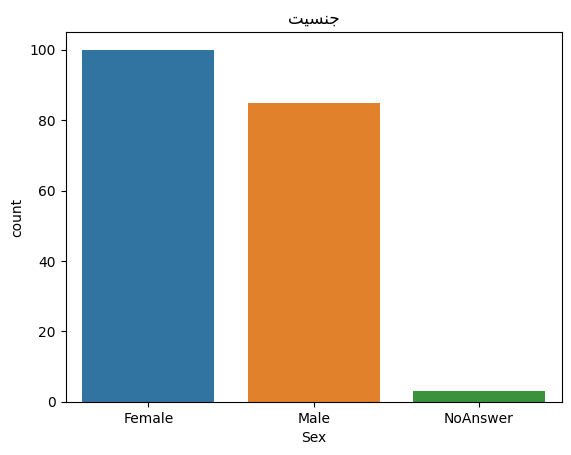

In [38]:

plt.clf()
PlotDFSex = CleandDataDFForPlots.copy()
PlotDF = CleandDataDFForPlots.copy()
PlotDFSex['Sex'] = PlotDF['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']
SexualityFigPersianTitle = 'جنسیت'
SexualityFigPersianTitlereshaped_text = reshaper.reshape(
    SexualityFigPersianTitle)
SexualityFigPersianTitlebidi_text = get_display(
    SexualityFigPersianTitlereshaped_text)

plt.title(SexualityFigPersianTitlebidi_text, fontsize=12)
sns.countplot(x='Sex', data=PlotDFSex)
plt.savefig('../img/sexualityAgainstPopulation.pdf')
plt.show()
# fig.clear()
# plt.close()


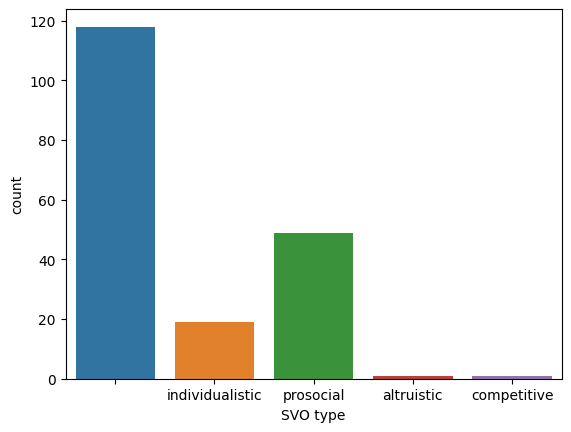

In [39]:
plt.clf()
# PlotDFSex = CleandDataDFForPlots.copy()
PlotDF = CleandDataDFForPlots.copy()

PlotDFSVOSex = CleandDataDFForPlots.copy().dropna(subset=['SVOSliderTest.type'])
PlotDFSVOSex['SVO type'] = PlotDF['SVOSliderTest.type']
# PlotDFSVOSex['SVOScore'] = PlotDF['SVOSliderTest.svo']
PlotDFSVOSex['Sex'] = PlotDF['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']
# PlotDF
# PlotDFDropedSVONaN = PlotDF.dropna(subset=['SVOSliderTest.type']).copy()
# SexualitySVOFigPersianTitle = 'رویکرد ارزش اجتماعی'
# SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
#     SexualitySVOFigPersianTitle)
# SexualitySVOFigPersianTitlebidi_text = get_display(
#     SexualitySVOFigPersianTitleTitlereshaped_text)
# plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
# sns.countplot(x='SVO type', hue='Sex', data=PlotDFSVOSex)
sns.countplot(x='SVO type',  data=PlotDFSVOSex)
plt.savefig('../img/sexualityAndSVOAgainstPopulation.pdf')
plt.show()
# fig.clear()
# plt.close()



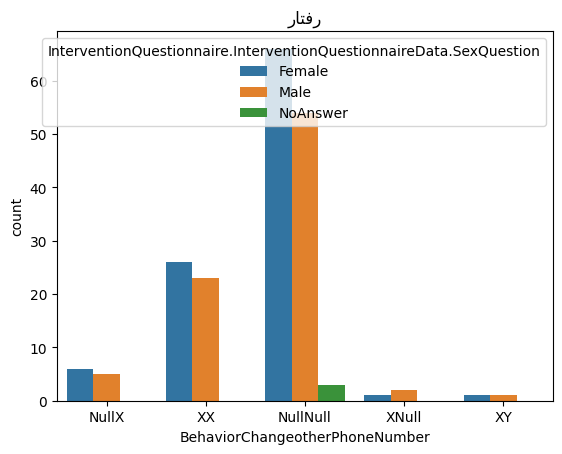

In [40]:
plt.clf()

PlotDFSex = CleandDataDFForPlots.copy()
PlotDF = CleandDataDFForPlots.copy()


# PlotDF
# PlotDFDropedSVONaN = PlotDF.dropna(subset=['SVOSliderTest.type']).copy()

sns.countplot(x='BehaviorChangeotherPhoneNumber', hue='InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion', data=EffectResponseDisclosureDF)
SexualitySVOFigPersianTitle = 'رفتار'
SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
    SexualitySVOFigPersianTitle)
SexualitySVOFigPersianTitlebidi_text = get_display(
    SexualitySVOFigPersianTitleTitlereshaped_text)
    
plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)

plt.savefig('../img/Frequency_Behavior_Phnone_Number.pdf')
plt.show()
# fig.clear()
# plt.close()
# fig.clf()

In [41]:

plt.clf()

PlotDFSex = CleandDataDFForPlots.copy()
PlotDF = CleandDataDFForPlots.copy()

PlotDFSVOSex = CleandDataDFForPlots.copy().dropna(subset=['SVOSliderTest.type'])
PlotDFSVOSex['SVO type'] = PlotDF['SVOSliderTest.type']
# PlotDFSVOSex['SVOScore'] = PlotDF['SVOSliderTest.svo']
PlotDFSVOSex['Sex'] = PlotDF['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']
# PlotDF
# PlotDFDropedSVONaN = PlotDF.dropna(subset=['SVOSliderTest.type']).copy()
# SexualitySVOFigPersianTitle = 'رویکرد ارزش اجتماعی'
# SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
#     SexualitySVOFigPersianTitle)
# SexualitySVOFigPersianTitlebidi_text = get_display(
#     SexualitySVOFigPersianTitleTitlereshaped_text)
# plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
# sns.countplot(x='SVO type', hue='Sex', data=PlotDFSVOSex)
sns.countplot(x='SVO type',  hue='Sex',  data=PlotDFSVOSex)

plt.savefig('../img/sexualityAndSVOAgainstPopulation.pdf')


In [42]:


plt.clf()

# داده های به دترد نخود
# آنهایی که تمت شدند
# چه ویژگی ایی داشته اند
# چه کساتنی
# PlotDF.rename(columns = {'SVOSliderTest.type':'SVO type'}, inplace = True)
PlotDFDTR = CleandDataDFForPlots.copy()
PlotDFDTR['Sex'] = PlotDFDTR['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']
SexualitySVOFigPersianTitle = 'نمودار هیستوگرام سه‌گانه تاریک'
SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
    SexualitySVOFigPersianTitle)
SexualitySVOFigPersianTitlebidi_text = get_display(
    SexualitySVOFigPersianTitleTitlereshaped_text)
var02_1 = 'نمره سه‌گانه تاریک'
var02_2 = arabic_reshaper.reshape(var02_1)
var02_3 = get_display(var02_2)
var03_1 = 'فراوانی'
var03_2 = arabic_reshaper.reshape(var03_1)
var03_3 = get_display(var03_2)

plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
bins = list(range(0, 50, 5))
plt.hist((PlotDFDTR['DarkTriadScore'].dropna()), bins,
         facecolor='r', alpha=0.7, edgecolor='k', linewidth=1)

# plt.xlabel("DarkTriadScore")
plt.xlabel(var02_3)
plt.ylabel(var03_3)
# sns.countplot(x='DarkTriadScore',data=PlotDF)
plt.savefig('../img/SexToDTR.pdf')
# plt.show()
# fig.clear()
plt.close()
plt.clf()


In [43]:

def ShortenningVars(InputVars):
    OutputVars = []
    for Tag in InputVars:
        ShortVar = Tag.split(".", -1)[-1].replace('-','')
        OutputVars.append(ShortVar)
    return OutputVars

In [44]:
EffectResponseDisclosureDFToRename = EffectResponseDisclosureDF.copy()
EffectAndResponseKeysToRename = [
    'LandingPage.submittime',
    'Assessment.Assessment.ExperimentGroup',
    'Assessment.Assessment.ReceiveOtherResultsRequest',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04',
    'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement',
    'InterventionQuestionnaire.InterventionQuestionnaireData.CityName',
    'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
    'InterventionQuestionnaire.InterventionQuestionnaireData.JobTitle',
    'InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
    'InterventionQuestionnaire.InterventionQuestionnaireData.MajorNameForOther',
    'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
    'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
    'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
    'InterventionQuestionnaire.InterventionQuestionnaireData.UniversityName',
    'InterventionQuestionnaire.InterventionQuestionnaireData.ImportanceOfScience',
    'InterventionQuestionnaire.InterventionQuestionnaireData.DataScieneFamiliarity',
    'SVOSliderTest.svo',
    'SVOSliderTest.type',
    'SVOSliderTest.isConsistent',
    'SVOSliderTest.selfTotal',
    'SVOSliderTest.otherTotal',
    'darktriad.darktriadsurvey.DTriad01Mac01',
    'darktriad.darktriadsurvey.DTriad02Mac02',
    'darktriad.darktriadsurvey.DTriad03Mac03',
    'darktriad.darktriadsurvey.DTriad04Mac04',
    'darktriad.darktriadsurvey.DTriad05Psy01',
    'darktriad.darktriadsurvey.DTriad06Psy02',
    'darktriad.darktriadsurvey.DTriad07Psy03',
    'darktriad.darktriadsurvey.DTriad08Psy04',
    'darktriad.darktriadsurvey.DTriad09Nars01',
    'darktriad.darktriadsurvey.DTriad10Nars02',
    'darktriad.darktriadsurvey.DTriad11Nars03',
    'darktriad.darktriadsurvey.DTriad12Nars04',
    'darktriad.isReversed',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy01',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy02',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy01',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy02',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy01',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy02',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy01',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy02',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy01',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy02',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy01',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy02',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy01',
    'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy02',
    'willingnessToPayOthers.attitudeGroupName',
    'willingnessToPayOthers.attitudeisReversed',
    'willingnessToPayOthers.normGroupName',
    'willingnessToPayOthers.normisReversed',
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-Attitude',
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-AttitudeImportance',
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-BehaviorQuestion',
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IdentificationwiththeReferent',
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IntentionQuestion',
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-PerceivedBehavioralControlQuestion',
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestion',
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionContext',
    'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionExpert',
]
CountPlotsForResponseVriables = ShortenningVars([
    *CountDisclosures, 'BehaviorChangeotherPhoneNumber'])
CountPlotsForEffectVariables = ShortenningVars([
    *LabelsUsualSuspectsValidityReliblity,
    *LabelsUsualSuspectsOrdinalTPB,
    *LabelsUsualSuspectsNominalBooleanTPB,
    *LabelsUsualSuspectsOrdinal,
    *LabelsUsualSuspectsNominalExperimentalIntervention,
    *LabelsUsualSuspectsNominalBoolean,
    *LabelsUsualSuspectsNominal
])
EffectAndResponseKeysRenamed = ShortenningVars(EffectAndResponseKeysToRename)

for Tag in EffectAndResponseKeysToRename:
    ShortCol = Tag.split(".", -1)[-1].replace('-','')
    EffectResponseDisclosureDFToRename.rename(
        columns={Tag: ShortCol}, inplace=True)


# 
# print(EffectResponseDisclosureDFToRename.loc[:,'ExperimentGroup'])
EffectResponseDisclosureDFToRename.loc[:,'ExperimentGroup'] = [i[0] for i in EffectResponseDisclosureDFToRename.loc[:,'ExperimentGroup']]
# print(EffectResponseDisclosureDFToRename.loc[:,'ExperimentGroup'])
# EffectAndResponseKeysRenamed


In [45]:
import pandas as pd
from plotnine import *
from plotnine.data import mtcars
from plotnine.ggplot import save_as_pdf_pages
# sns.countplot(x='BehaviorChangeotherPhoneNumber',
#  hue='InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion', data=EffectResponseDisclosureDF)

def combine(counts, percentages):
    fmt = '{} ({:.1f}%)'.format
    return [fmt(c, p) for c, p in zip(counts, percentages)]


In [46]:
# %%R -i SVOAndDTRNaNDroped -w 5 -h 5 --units in -r 200
# theme_set(theme_void())
# theme_set(theme_minimal())
# theme_set(theme_dark())

# def facet_pages01():
#     for CountPlotsForEffectVariable in CountPlotsForEffectVariables:
#         for CountPlotsForResponseVriable in CountPlotsForResponseVriables:
#             Factor01 = CountPlotsForResponseVriable
#             Factor02 = CountPlotsForEffectVariable
#             # if Factor01 == 'ReceiveOtherResultsRequest' or Factor02 == 'ReceiveOtherResultsRequest' or Factor01 == 'WaitingRoom' or Factor02 == 'WaitingRoom':
#             #     continue
#             try:
#                 if Factor01 == 'ReceiveOtherResultsRequest' or Factor02 == 'ReceiveOtherResultsRequest' or Factor01 == 'WaitingRoom' or Factor02 == 'WaitingRoom':
#                     continue
#                 yield (ggplot(EffectResponseDisclosureDFToRename, aes(f'factor({Factor01})', fill=f'factor({Factor02})'))
#                     + geom_bar()
#                 #  + geom_text(
#                 #      aes(label=after_stat('count')),
#                 #      stat='count',
#                 #      nudge_x=-0.14,
#                 #      nudge_y=0.125,
#                 #      va='bottom'
#                 #  )
#                 #  + geom_text(
#                 #      aes(label=after_stat('prop*100'), group=1),
#                 #      stat='count',
#                 #      nudge_x=0.14,
#                 #      nudge_y=0.125,
#                 #      va='bottom',
#                 #      format_string='({:.1f}%)'
#                 #  )
#                     + geom_text(
#                     aes(label=after_stat('combine(count, prop*100)'), group=1),
#                     stat='count',
#                     nudge_y=0.125,
#                     va='bottom'
#                 )
#                 ) 
#             except GeneratorExit:
#                 print(f'Factor01{Factor01},Factor02{Factor02}')
#             except TypeError:
#                 print(f'Type error Factor01: {Factor01},Factor02:{Factor02}')
#             except:
#                 print(f'Type error Factor01: {Factor01},Factor02:{Factor02}')
#             finally:
#                 print(f'Finally Factor01: {Factor01},Factor02: {Factor02}')

# def facet_pages02():
#     for CountPlotsForEffectVariable in CountPlotsForEffectVariables:
#         for CountPlotsForResponseVriable in CountPlotsForResponseVriables:
#             Factor01 = CountPlotsForResponseVriable
#             Factor02 = CountPlotsForEffectVariable
#             # if Factor01 == 'ReceiveOtherResultsRequest' or Factor02 == 'ReceiveOtherResultsRequest' or Factor01 == 'WaitingRoom' or Factor02 == 'WaitingRoom':
#             #     continue
#             def prop_per_x(x, count):
#                 """
#                 Compute the proportion of the counts for each value of x
#                 """
#                 df = pd.DataFrame({
#                     'x': x,
#                     'count': count
#                 })
#                 prop = df['count']/df.groupby('x')['count'].transform('sum')
#                 return prop

#             try:
#                 if Factor01 == 'ReceiveOtherResultsRequest' or Factor02 == 'ReceiveOtherResultsRequest' or Factor01 == 'WaitingRoom' or Factor02 == 'WaitingRoom':
#                     continue
#                 yield (ggplot(EffectResponseDisclosureDFToRename, aes(f'factor({Factor01})', fill=f'factor({Factor02})'))
#                     + geom_bar(position='dodge2')
#                     + geom_text(
#                     aes(
#                         label=after_stat('prop_per_x(x, count) * 100'),
#                         y=stage(after_stat='count', after_scale='y+.25')
#                     ),
#                     stat='count',
#                     position=position_dodge2(width=0.9),
#                     format_string='{:.1f}%',
#                     size=9,
#                 )
#                 )
#             except GeneratorExit:
#                 print(f'Factor01{Factor01},Factor02{Factor02}')
#             except TypeError:
#                 print(f'Type error Factor01: {Factor01},Factor02:{Factor02}')
#             except:
#                 print(f'Type error Factor01: {Factor01},Factor02:{Factor02}')
#             finally:
#                 print(f'Finally Factor01: {Factor01},Factor02: {Factor02}')

# def facet_pages03():
#     for CountPlotsForEffectVariable in CountPlotsForEffectVariables:
#         for CountPlotsForResponseVriable in CountPlotsForResponseVriables:
#             Factor01 = CountPlotsForResponseVriable
#             Factor02 = CountPlotsForEffectVariable
#             try:
#                 if Factor01 == 'ReceiveOtherResultsRequest' or Factor02 == 'ReceiveOtherResultsRequest' or Factor01 == 'WaitingRoom' or Factor02 == 'WaitingRoom':
#                     continue
#                 yield (ggplot(EffectResponseDisclosureDFToRename, aes(f'factor({Factor01})', fill=f'factor({Factor02})'))
#                     + geom_bar(position='fill')
#                     + geom_label(
#                     aes(label=after_stat('prop_per_x(x, count) * 100')),
#                     stat='count',
#                     position='fill',
#                     format_string='{:.1f}%',
#                     size=9,
#                 )
#                     #   + geom_text(
#                     #      aes(label=after_stat('count'), group=1),
#                     #      stat='count',
#                     #      nudge_y=0.125,
#                     #      va='bottom'
#                     #  )
#                 )
            
#             except GeneratorExit:
#                 print(f'Factor01{Factor01},Factor02{Factor02}')
#             except TypeError:
#                 print(f'Type error Factor01: {Factor01},Factor02:{Factor02}')
#             except:
#                 print(f'Type error Factor01: {Factor01},Factor02:{Factor02}')
#             finally:
#                 print(f'Finally Factor01: {Factor01},Factor02: {Factor02}')
# save_as_pdf_pages(facet_pages01())
# save_as_pdf_pages(facet_pages02())
# save_as_pdf_pages(facet_pages03())


In [47]:
# # %%R -i SVOAndDTRNaNDroped -w 5 -h 5 --units in -r 200



# print(ggplot(EffectResponseDisclosureDFToRename, aes('factor(BehaviorChangeotherPhoneNumber)', fill='factor(Gender)'))
#  + geom_bar()
# #  + geom_text(
# #      aes(label=after_stat('count')),
# #      stat='count',
# #      nudge_x=-0.14,
# #      nudge_y=0.125,
# #      va='bottom'
# #  )
# #  + geom_text(
# #      aes(label=after_stat('prop*100'), group=1),
# #      stat='count',
# #      nudge_x=0.14,
# #      nudge_y=0.125,
# #      va='bottom',
# #      format_string='({:.1f}%)'
# #  )
#   + geom_text(
#      aes(label=after_stat('combine(count, prop*100)'), group=1),
#      stat='count',
#      nudge_y=0.125,
#      va='bottom'
#  )
# )
# def prop_per_x(x, count):
#     """
#     Compute the proportion of the counts for each value of x
#     """
#     df = pd.DataFrame({
#         'x': x,
#         'count': count
#     })
#     prop = df['count']/df.groupby('x')['count'].transform('sum')
#     return prop

# print(ggplot(EffectResponseDisclosureDFToRename, aes('factor(BehaviorChangeotherPhoneNumber)', fill='factor(Gender)'))
#  + geom_bar(position='dodge2')
#  + geom_text(
#      aes(
#          label=after_stat('prop_per_x(x, count) * 100'),
#          y=stage(after_stat='count', after_scale='y+.25')
#      ),
#      stat='count',
#      position=position_dodge2(width=0.9),
#      format_string='{:.1f}%',
#      size=9,
#  )
# )


# print(ggplot(EffectResponseDisclosureDFToRename, aes('factor(BehaviorChangeotherPhoneNumber)', fill='factor(Gender)'))
#  + geom_bar(position='fill')
#  + geom_label(
#      aes(label=after_stat('prop_per_x(x, count) * 100')),
#      stat='count',
#      position='fill',
#      format_string='{:.1f}%',
#      size=9,
#  )
# #   + geom_text(
# #      aes(label=after_stat('count'), group=1),
# #      stat='count',
# #      nudge_y=0.125,
# #      va='bottom'
# #  )
# )



In [48]:


# # PlotDF.rename(columns = {'SVOSliderTest.type':'SVO type'}, inplace = True)

# SexualitySVOFigPersianTitle = 'نمودار پراکنش ارزش گذاری مجموعه‌داده نسبت به رویکرد ارزش اجتماعی'
# SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
#     SexualitySVOFigPersianTitle)
# SexualitySVOFigPersianTitlebidi_text = get_display(
#     SexualitySVOFigPersianTitleTitlereshaped_text)
# plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
# SVOAndDTRNaNDroped = CleandDataDFForPlots.dropna(
#     subset=['DarkTriadScore', 'SVOScore'])
# print(SVOAndDTRNaNDroped.loc[:, ['SVOScore', 'DarkTriadScore']])
# print(len(SVOAndDTRNaNDroped.loc[:, ['SVOScore', 'DarkTriadScore']]))
# # sns.countplot(x='SVO type', data=PlotDF)
# var02_1 = 'نمره رویکرد ارزش اجتماعی'
# var02_2 = arabic_reshaper.reshape(var02_1)
# var02_3 = get_display(var02_2)
# var03_1 = 'نمره پرسشنامه سه‌گانه تاریک'
# var03_2 = arabic_reshaper.reshape(var03_1)
# var03_3 = get_display(var03_2)
# plt.xlabel(var02_3)
# plt.ylabel(var03_3)
# plt.scatter(pd.to_numeric(SVOAndDTRNaNDroped['SVOScore']), pd.to_numeric(
#     SVOAndDTRNaNDroped['DarkTriadScore']))
# # plt.scatter(SVOAndDTRNaNDroped[0:19])
# # list(SVOAndDTRNaNDroped.iloc[:,0].astype(float))
# # list(SVOAndDTRNaNDroped.iloc[:,0])
# plt.show()

# plt.savefig('../img/ScatterSVOScoreDarkTriadScore.pdf')


In [49]:


# PlotDF.rename(columns = {'SVOSliderTest.type':'SVO type'}, inplace = True)

# SexualitySVOFigPersianTitle = 'نمودار پراکنش ارزش گذاری مجموعه‌داده نسبت به رویکرد ارزش اجتماعی'
# SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
#     SexualitySVOFigPersianTitle)
# SexualitySVOFigPersianTitlebidi_text = get_display(
#     SexualitySVOFigPersianTitleTitlereshaped_text)
# plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
# SVOAndDTRNaNDroped = CleandDataDFForPlots.dropna(
#     subset=['DarkTriadScore', 'SVOScore'])
# print(SVOAndDTRNaNDroped.loc[:, ['SVOScore', 'DarkTriadScore']])
# print(len(SVOAndDTRNaNDroped.loc[:, ['SVOScore', 'DarkTriadScore']]))
# var02_1 = 'نمره رویکرد ارزش اجتماعی'
# var02_2 = arabic_reshaper.reshape(var02_1)
# var02_3 = get_display(var02_2)
# var03_1 = 'نمره پرسشنامه سه‌گانه تاریک'
# var03_2 = arabic_reshaper.reshape(var03_1)
# var03_3 = get_display(var03_2)
# plt.xlabel(var02_3)
# plt.ylabel(var03_3)
# plt.scatter(pd.to_numeric(SVOAndDTRNaNDroped['SVOScore']), pd.to_numeric(
#     SVOAndDTRNaNDroped['DarkTriadScore']))
# plt.savefig('../img/ScatterSVOScoreDarkTriadScore.pdf')
# pi = robjects.r['pi']
# type(pi)
# mtcars = data(datasets).fetch('mtcars')['mtcars']
# print(mtcars)

# grdevices = importr('grDevices')
# grdevices.png(file="../img/mtcars.png", width=1024, height=512)
# datasets = importr('datasets')
# mtcars = data(datasets).fetch('mtcars')['mtcars']

# pp = (ggplot2.ggplot(mtcars) +
#       ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') +
#       ggplot2.geom_point())
# pp.plot()


In [50]:

# SVOAndDTRNaNDroped['Sex'] = SVOAndDTRNaNDroped['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']


# from plotnine import ggplot, aes, geom_boxplot

# (pn.ggplot(CleandDataDFForPlots)
#  + aes(x="factor(SVOSliderTest.type)", y="DarkTriadScore")
#  + geom_boxplot()
#  + geom_point()
#  )
# pn.ggplot(SVOAndDTRNaNDroped) + aes(x="SVOSliderTest.type",
#                                     y="DarkTriadScore") + geom_point()
# (
#   ggplot(huron)
#   + aes(x="factor(decade)", y="level")
#   + geom_boxplot()
#   + geom_point()
# )
# CleandDataDFForPlots['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']
